In [1]:
import random 
import warnings
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
import os 
os.environ['PYTHONHASHSEED']=str(1)

In [3]:
import tensorflow as tf 
import tensorflow.keras as keras 
import tensorflow.keras.layers 

In [4]:
def reset_random_seeds():
    os.environ['PYTHONHASHSEED']=str(1)
    tf.random.set_seed(1)
    np.random.seed(1)
    random.seed(1)

In [5]:
data=pd.read_csv('C:\\Users\\C2074370\\1-projects\\Phys_Descrip.txt')

In [6]:
data.drop(['Config','Ecoh','Eb','Eadh'], axis=1, inplace=True)

In [7]:
X=data.iloc[:,:-1] ## independent features
y=data.iloc[:,-1] ## dependent features

In [8]:
scaler=StandardScaler()
X_=train_scaled=scaler.fit(X)
X_train_scaled=scaler.transform(X)

y_scaled=(y-np.mean(y))/np.std(y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_scaled, test_size=0.25,random_state=0)

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [11]:
reset_random_seeds()
Ann_model = Sequential()

# The Input Layer :
Ann_model.add(Dense(360, kernel_initializer='normal',input_dim = 11, activation='relu'))
#Ann_model.add(Dropout(0.2, input_shape=(11,)))

# The Hidden Layers :
Ann_model.add(Dense(360,activation='relu'))
Ann_model.add(Dense(360,activation='relu'))
Ann_model.add(Dense(180,activation='relu'))
Ann_model.add(Dense(180,activation='relu'))
Ann_model.add(Dense(90,activation='relu'))

# The Output Layer :
Ann_model.add(Dense(1,activation='linear'))

# Compile the network :
Ann_model.compile(loss='mse', optimizer='adagrad', metrics=['mean_squared_error'])
Ann_model.summary()

# Fitting the ANN to the Training set
model_history=Ann_model.fit(X_train, y_train,validation_data=(X_train,y_train),verbose=0, batch_size = 10, epochs = 100)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 360)               4320      
_________________________________________________________________
dense_1 (Dense)              (None, 360)               129960    
_________________________________________________________________
dense_2 (Dense)              (None, 360)               129960    
_________________________________________________________________
dense_3 (Dense)              (None, 180)               64980     
_________________________________________________________________
dense_4 (Dense)              (None, 180)               32580     
_________________________________________________________________
dense_5 (Dense)              (None, 90)                16290     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9

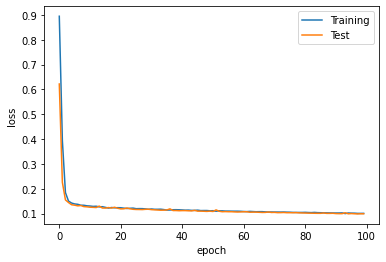

In [12]:
plt.plot(model_history.history['loss'], label='Training')
plt.plot(model_history.history['val_loss'], label='Test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.show()

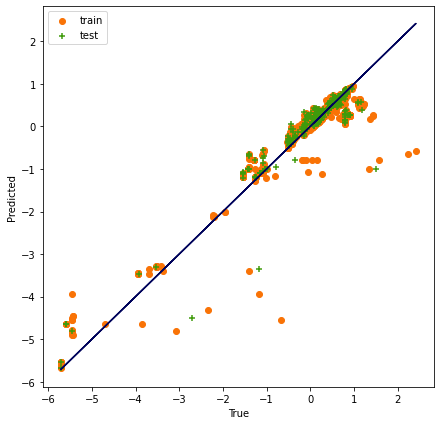

In [13]:
pred_test=Ann_model.predict(X_test)
pred_train=Ann_model.predict(X_train)

plt.figure(figsize=(7,7))
plt.scatter(y_train,pred_train, marker='o', color='#f97306', label='train' )
plt.scatter(y_test,pred_test, marker='+', color='#3f9b0b', label='test' )
plt.legend(loc='upper left')
plt.plot(y_train,y_train, color='#00035b')
plt.xlabel('True')
plt.ylabel('Predicted')
plt.show()

In [14]:
from sklearn import metrics 
from sklearn.metrics import r2_score

In [15]:
print('MAE:', metrics.mean_absolute_error(y_test, pred_test))
print('MSE:', metrics.mean_squared_error(y_test, pred_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_test)))
print('R_squared:'+ str(round(r2_score(y_test,pred_test),2)))

MAE: 0.13709040626123223
MSE: 0.07542127877171856
RMSE: 0.2746293479796334
R_squared:0.9


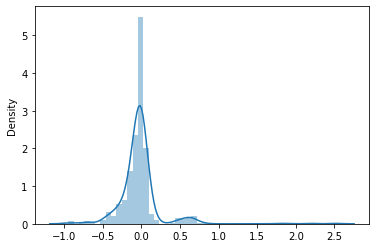

In [16]:
import seaborn as sns
sns.distplot(y_test.values.reshape(-1,1)-pred_test);

In [17]:
np.mean(y_test)

0.054600238394931756

In [18]:
np.mean(pred_test)

0.07873616